In [1]:
import numpy as np          # type: ignore
import pandas as pd         # type: ignore

In [2]:
Basic_index = [ ('California', 2000),
                ('California', 2010),
                ('New York', 2000),
                ('New York', 2010)]

populations = [ 10000,
                15000,
                20000,
                25000 ]

MultiIndex = pd.MultiIndex.from_tuples(Basic_index)

data = pd.Series(populations, index=MultiIndex)
data

California  2000    10000
            2010    15000
New York    2000    20000
            2010    25000
dtype: int64

<div style="width: 100%; height: 10px; background: linear-gradient(to right, orange, red, orange, red, orange); border-radius: 5px; margin: 20px 0;"></div>

<h1 align="center">🔥 Mastering MultiIndex Operations 🔥</h1>

In [3]:
print(data[:, 2010])
print("===============================")
print(data[:"New York"])

California    15000
New York      25000
dtype: int64
California  2000    10000
            2010    15000
New York    2000    20000
            2010    25000
dtype: int64


In [4]:
# data[:"New York",2010]  # error message
data[:"New York"]

California  2000    10000
            2010    15000
New York    2000    20000
            2010    25000
dtype: int64

> ## **Data rotation**

In [5]:
data.unstack()      # (3D -> 2D)   see it in stack & unstack

,2000,2010
California,10000,15000
New York,20000,25000


> ## **Add columns**

In [6]:
data

California  2000    10000
            2010    15000
New York    2000    20000
            2010    25000
dtype: int64

In [7]:
data = pd.DataFrame(  { "Total Population": data ,
                        "under 18" :[9267089, 9284094, 4687374, 4318033] } )
data

Total Population  under 18
California 2000             10000   9267089
           2010             15000   9284094
New York   2000             20000   4687374
           2010             25000   4318033

> ## **Overlapping data**

In [8]:
data = np.round(np.random.randn(4, 6))
print(f"data: \n{data}")
print("===============================")

The_index = pd.MultiIndex.from_product([[2013, 2014],
                                        [ 1  ,  2  ]],
                                        names=['year', 'visit'])
print(f"The_index: \n{The_index}")
print("===============================")

The_columns = pd.MultiIndex.from_product( [ ['Bob', 'Guido', 'Sue'],
                                            ['HR' , 'Temp'] ],  names=['subject', 'type'])
print(f"The_columns: \n{The_columns}")

data: 
[[ 0.  0.  0. -0. -1.  0.]
 [-1. -1. -0. -0. -1.  0.]
 [-0.  1.  0.  0. -1. -0.]
 [-2. -2.  0. -0.  0.  0.]]
The_index: 
MultiIndex([(2013, 1),
            (2013, 2),
            (2014, 1),
            (2014, 2)],
           names=['year', 'visit'])
The_columns: 
MultiIndex([(  'Bob',   'HR'),
            (  'Bob', 'Temp'),
            ('Guido',   'HR'),
            ('Guido', 'Temp'),
            (  'Sue',   'HR'),
            (  'Sue', 'Temp')],
           names=['subject', 'type'])


In [9]:
health_data = pd.DataFrame(data, index=The_index, columns=The_columns)
health_data

subject     Bob      Guido       Sue     
type         HR Temp    HR Temp   HR Temp
year visit                               
2013 1      0.0  0.0   0.0 -0.0 -1.0  0.0
     2     -1.0 -1.0  -0.0 -0.0 -1.0  0.0
2014 1     -0.0  1.0   0.0  0.0 -1.0 -0.0
     2     -2.0 -2.0   0.0 -0.0  0.0  0.0

In [10]:
health_data["Guido","HR"] 

year  visit
2013  1        0.0
      2       -0.0
2014  1        0.0
      2        0.0
Name: (Guido, HR), dtype: float64

> this is >> 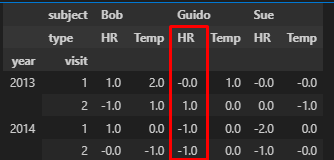

In [11]:
health_data.loc[:2013,("Guido", "HR")]

year  visit
2013  1        0.0
      2       -0.0
Name: (Guido, HR), dtype: float64

<h1 align="center"><strong></strong></h1>
<div style="background-color:rgb(255, 255, 255) ; color:rgb(46, 40, 40); width: 100%; height: 50px; text-align: center; font-weight: bold; line-height: 50px; margin: 10px 0; font-size: 24px;">
to choose from MultiIndex 
</div>

In [12]:
idx = pd.IndexSlice
health_data.loc[idx[:,1],idx[:,"HR"]]   # I choose visit =1 , HR only from all col and row

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,0.0,0.0,-1.0
2014,1,-0.0,0.0,-1.0


In [13]:
health_data.loc[idx[2013,1],idx[:,"HR"]]

subject  type
Bob      HR      0.0
Guido    HR      0.0
Sue      HR     -1.0
Name: (2013, 1), dtype: float64

In [14]:
health_data.loc[idx[2013,1],idx["Guido","HR"]]

0.0